<a href="https://colab.research.google.com/github/Fathima015/Task-4/blob/main/Task-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt


In [4]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [6]:
df=pd.read_csv(next(iter(uploaded)))
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **1. Load & Explore Binary Classification Dataset**


In [8]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.shape)
print(df.head())
print(df['target'].value_counts())

(569, 31)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
print(df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


# **2. Train/Test Split and Standardize Features**
# **3. Fit Logistic Regression Model**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# **4. Evaluate: Confusion Matrix, Precision, Recall, ROC-AUC**

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.99737962659679


# **5. Tune Threshold and Explain Sigmoid**

In [24]:
custom_threshold = 0.3
y_pred_custom = (y_prob >= custom_threshold).astype(int)

print("Confusion Matrix (Threshold 0.3):\n", confusion_matrix(y_test, y_pred_custom))


Confusion Matrix (Threshold 0.3):
 [[41  2]
 [ 0 71]]


 ## What is the Sigmoid Function?


In logistic regression, we use the **sigmoid function** to map any real-valued number into a probability between **0 and 1**.

The sigmoid function formula is:

σ(z)=
1 / (1 + e^(-z))

- If the output > 0.5 → the model predicts **Class 1**
- If the output < 0.5 → the model predicts **Class 0**

Let’s plot the sigmoid function to visualize it.



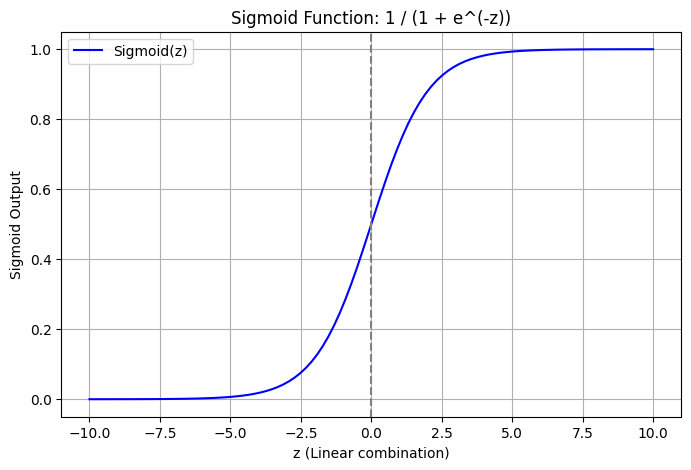

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Range of values for z
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(z, sig, label='Sigmoid(z)', color='blue')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title("Sigmoid Function: 1 / (1 + e^(-z))")
plt.xlabel("z (Linear combination)")
plt.ylabel("Sigmoid Output")
plt.grid(True)
plt.legend()
plt.show()


## **Sigmoid Function Applied to Breast Cancer Data**



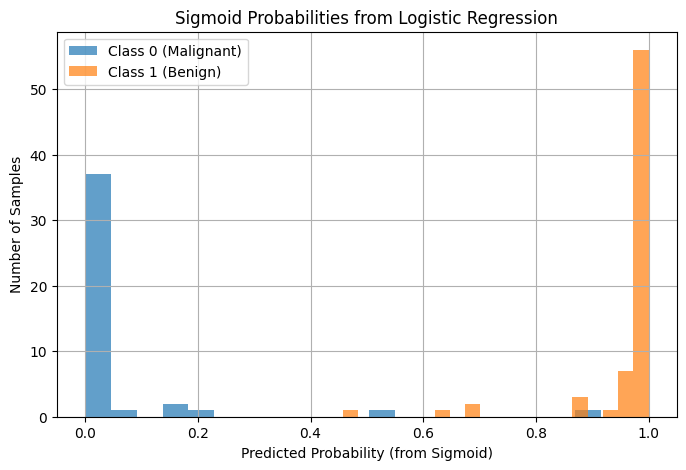

In [26]:
z = model.decision_function(X_test_scaled)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

probs = sigmoid(z)

plt.figure(figsize=(8, 5))
plt.hist(probs[y_test == 0], bins=20, alpha=0.7, label='Class 0 (Malignant)')
plt.hist(probs[y_test == 1], bins=20, alpha=0.7, label='Class 1 (Benign)')
plt.xlabel("Predicted Probability (from Sigmoid)")
plt.ylabel("Number of Samples")
plt.title("Sigmoid Probabilities from Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()